<a href="https://colab.research.google.com/github/jv-mx/TLC-DC/blob/main/DS_C3_SC1_JONATHANVILLAVICENCIO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**DS_C3_SC1 - PLATAFORMAS DE VISUALIZACIÓN**

---

**Reto: Explorando el índice de felicidad**

NOMBRE DEL PARTICIPANTE: JONATHAN VILLAVICENCIO

1.	Genera una libreta en Google Colab para el reto, cuya estructura esté basada en los análisis solicitados.

2.	Descarga el archivo: happiness_report.csv y guarda, en un dataframe (`happiness`), todos sus registros.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random

In [14]:
happiness = pd.read_csv('/content/happiness_report.csv')
print('\nDataFrame: happiness\n')
display(happiness.head())
print('\nDataFrame info\n')
display(happiness.info())


DataFrame: happiness



,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298



DataFrame info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


None

3.	A partir del dataframe happiness obtén otro (`mexico`) donde sólo almacenes la información de México. Haz que la columna `Country or region` quede como índice.

In [16]:
mexico = happiness[happiness['Country or region'] == 'Mexico'].set_index('Country or region')
print('\nDataFrame: mexico\n')
display(mexico)


DataFrame: mexico



,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Country or region,,,,,,,,
Mexico,23,6.595,1.07,1.323,0.861,0.433,0.074,0.073


4.	Obtén un histograma del puntaje (`score`) para identificar el rango o clase más frecuente. Ubica el valor de México con una etiqueta de texto.

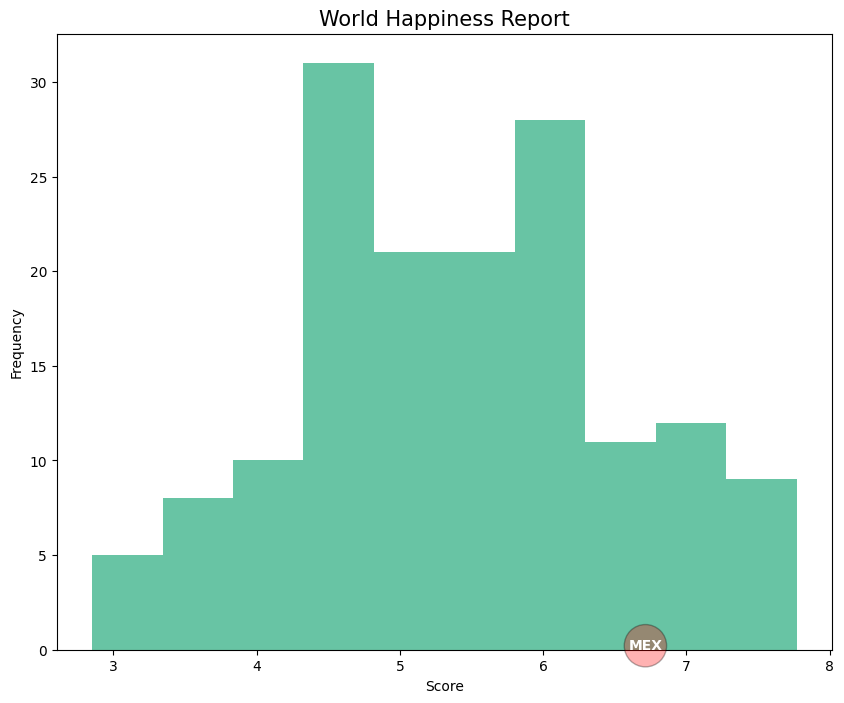

In [33]:
props_bbox = {'boxstyle': 'circle',
              'facecolor': 'red',
              'alpha': 0.3}

fig = plt.figure(figsize=(10, 8))
plt.hist(happiness['Score'],color='#68c4a4')
plt.title('World Happiness Report',fontsize=15,horizontalalignment='center')
plt.xlabel('Score',fontsize=10)
plt.ylabel('Frequency',fontsize=10)
plt.text(happiness.loc[happiness['Country or region'] == 'Mexico', 'Score'], 0, 'MEX', bbox=props_bbox, color='white', fontweight='bold')

plt.show()

5.	Construye un box plot para la columna esperanza de vida (`Healthy life expectancy`). Ubica el valor de México con una anotación.

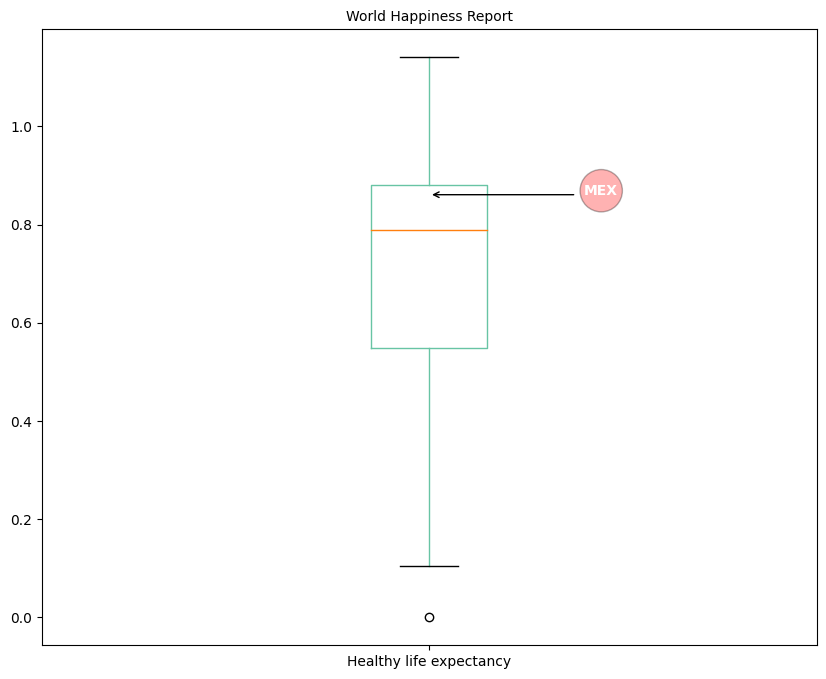

In [48]:
props_bbox = {'boxstyle': 'circle',
              'facecolor': 'red',
              'alpha': 0.3}

mex = happiness.loc[happiness['Country or region'] == 'Mexico', 'Healthy life expectancy']

fig = plt.figure(figsize=(10, 8))
plt.boxplot(happiness['Healthy life expectancy'].dropna(),labels=['Healthy life expectancy'], boxprops ={'color':'#68c4a4'}, whiskerprops={'color':'#68c4a4'})
plt.title('World Happiness Report',fontsize=10,horizontalalignment='center')
plt.text(1.2,mex, 'MEX', bbox=props_bbox, color='white', fontweight='bold')
plt.annotate('', xy=(1, mex), xytext=(1.19, mex), arrowprops=dict(facecolor='black', arrowstyle='->'))

plt.show()

6.	Crea una gráfico circular para analizar en qué medida los factores contribuyen a evaluar la felicidad en México. Para ello, deberás modificar la estructura del dataframe `mexico` obtenido anteriormente.

In [20]:
mexPie = mexico.T[2:]
mexPie.columns = ['Factors']
print('\nDataFrame para creación de gráfico circular\n')
display(mexPie)


DataFrame para creación de gráfico circular



,Factors
GDP per capita,1.070
Social support,1.323
Healthy life expectancy,0.861
Freedom to make life choices,0.433
Generosity,0.074
Perceptions of corruption,0.073


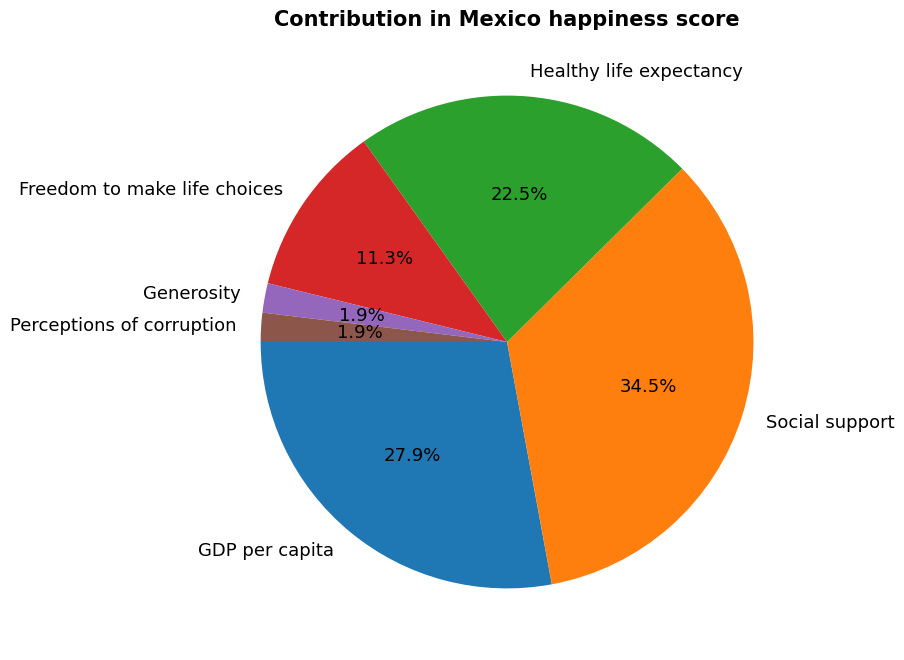

In [37]:
labels = mexPie.index
values = mexPie['Factors']


plt.figure(figsize=(10, 8))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=180,textprops={'fontsize': 13})
plt.title('Contribution in Mexico happiness score',fontsize=15, fontweight='bold')


plt.show()


7.	Filtra el dataframe para quedarte con 5 países (el más feliz, el menos feliz, México y dos más de tu interés) y visualiza en una misma gráfica los 6 factores.


DataFrame "happiness" filtrado por 5 países



,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
22,23,Mexico,6.595,1.070,1.323,0.861,0.433,0.074,0.073
24,25,Taiwan,6.446,1.368,1.430,0.914,0.351,0.242,0.097
67,68,Russia,5.648,1.183,1.452,0.726,0.334,0.082,0.031
155,156,South Sudan,2.853,0.306,0.575,0.295,0.010,0.202,0.091



DataFrame ajustado a gráfico



Country or region,Finland,Mexico,Taiwan,Russia,South Sudan
GDP per capita,1.340,1.070,1.368,1.183,0.306
Social support,1.587,1.323,1.430,1.452,0.575
Healthy life expectancy,0.986,0.861,0.914,0.726,0.295
Freedom to make life choices,0.596,0.433,0.351,0.334,0.010
Generosity,0.153,0.074,0.242,0.082,0.202
Perceptions of corruption,0.393,0.073,0.097,0.031,0.091



Gráfico de barras de factores de felicidad



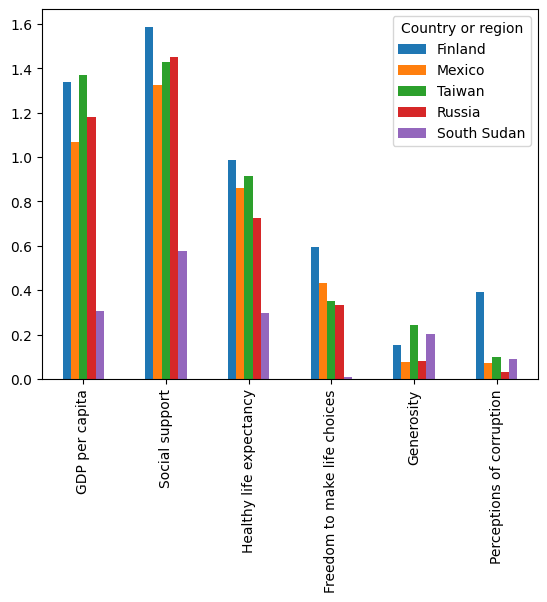

In [40]:
mostH = happiness.loc[happiness.index[0],'Country or region']
lessH = happiness.loc[happiness.index[-1],'Country or region']
mexH = happiness.loc[happiness['Country or region'] == 'Mexico', 'Country or region'].values[0]
rand1H = happiness.loc[happiness.index[random.randint(0, len(happiness) - 1)],'Country or region']
rand2H = happiness.loc[happiness.index[random.randint(0, len(happiness) - 1)],'Country or region']

while len(set([mostH, lessH, mexH, rand1H, rand2H])) < 5:
    mostH = happiness.loc[happiness.index[0], 'Country or region']
    lessH = happiness.loc[happiness.index[-1], 'Country or region']
    mexH = happiness.loc[happiness['Country or region'] == 'Mexico', 'Country or region'].values[0]
    rand1H = happiness.loc[happiness.index[random.randint(0, len(happiness) - 1)], 'Country or region']
    rand2H = happiness.loc[happiness.index[random.randint(0, len(happiness) - 1)], 'Country or region']

countries = mostH,lessH,mexH, rand1H, rand2H
filtered_happiness = happiness[happiness['Country or region'].isin(countries)]

print('\nDataFrame "happiness" filtrado por 5 países\n')
display(filtered_happiness)

filtered_happiness_T = filtered_happiness.set_index('Country or region')
filtered_happiness_T = filtered_happiness_T.T[2:]

print('\nDataFrame ajustado a gráfico\n')
display(filtered_happiness_T)

print('\nGráfico de barras de factores de felicidad\n')
filtered_happiness_T.plot(kind='bar')
plt.show()

8.	Crea una matriz de subgráficas de 2 x 3 con scatter plots del puntaje (`score`) versus los 6 factores para determinar qué factor influye más en la evaluación.

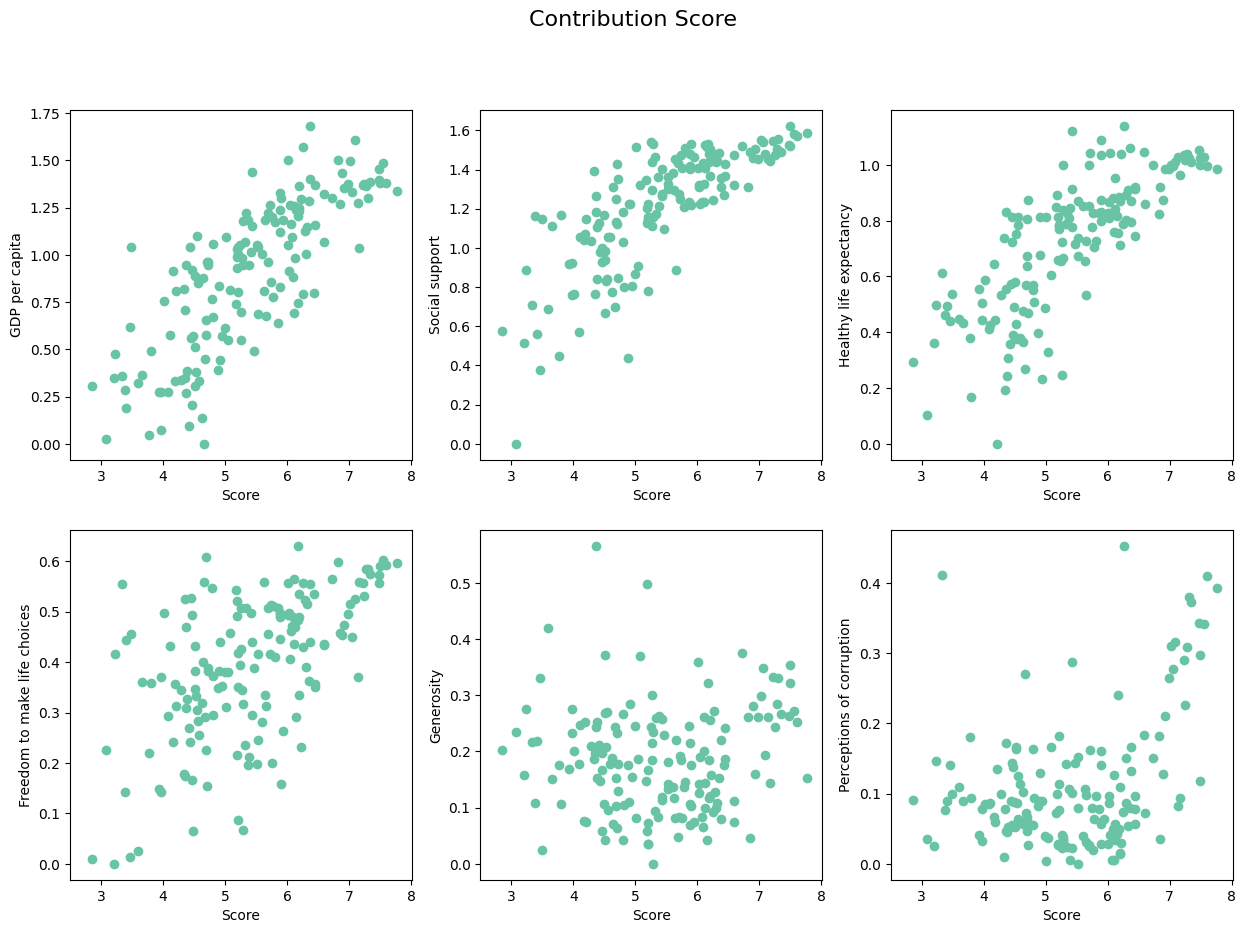

In [43]:
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Contribution Score', fontsize=16)

plts = filtered_happiness_T.index

for i, pl in enumerate(plts):
    j = i // 3
    k = i % 3

    ax = axs[j, k]
    ax.scatter(x=happiness['Score'], y=happiness[pl], c='#68c4a4')
    ax.set_xlabel('Score')
    ax.set_ylabel(pl)
    ax.set_xlim(left=2.5)
plt.show()


9.	Comprueba lo anterior con un heatmap donde incluyas los índices de correlación.

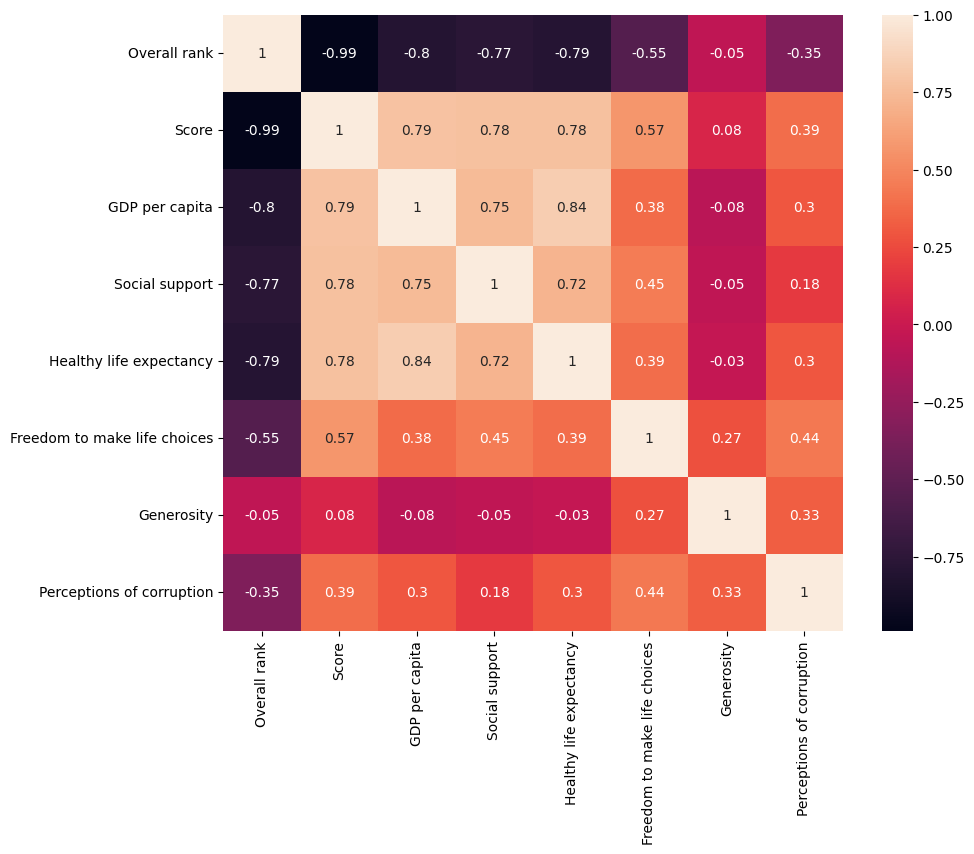

In [44]:
fig = plt.figure(figsize=(10, 8))
corr_matx = happiness.corr(numeric_only=True)
sns.heatmap(round(corr_matx, 2), annot=True)

plt.show()

10.	Combina con el dataframe `metada` (Metadata.csv) para graficar la felicidad promedio por región.

In [28]:
metadata = pd.read_csv('Metadata.csv')
print('\nDataFrame: metadata\n')
display(metadata.head())


DataFrame: metadata



,Country Code,Region,IncomeGroup,SpecialNotes,TableName
0,ABW,Latin America & Caribbean,High income,NaN,Aruba
1,AFG,South Asia,Low income,NaN,Afghanistan
2,AGO,Sub-Saharan Africa,Lower middle income,NaN,Angola
3,ALB,Europe & Central Asia,Upper middle income,NaN,Albania
4,AND,Europe & Central Asia,High income,NaN,Andorra


In [29]:
merged = pd.merge(right=happiness, left=metadata,right_on='Country or region', left_on='TableName', left_index=False, right_index=False,)
print('\nDataFrame: merged\n')
display(merged.head())


DataFrame: merged



,Country Code,Region,IncomeGroup,SpecialNotes,TableName,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,AFG,South Asia,Low income,NaN,Afghanistan,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
1,ALB,Europe & Central Asia,Upper middle income,NaN,Albania,107,Albania,4.719,0.947,0.848,0.874,0.383,0.178,0.027
2,ARE,Middle East & North Africa,High income,NaN,United Arab Emirates,21,United Arab Emirates,6.825,1.503,1.310,0.825,0.598,0.262,0.182
3,ARG,Latin America & Caribbean,Upper middle income,NaN,Argentina,47,Argentina,6.086,1.092,1.432,0.881,0.471,0.066,0.050
4,ARM,Europe & Central Asia,Upper middle income,NaN,Armenia,116,Armenia,4.559,0.850,1.055,0.815,0.283,0.095,0.064


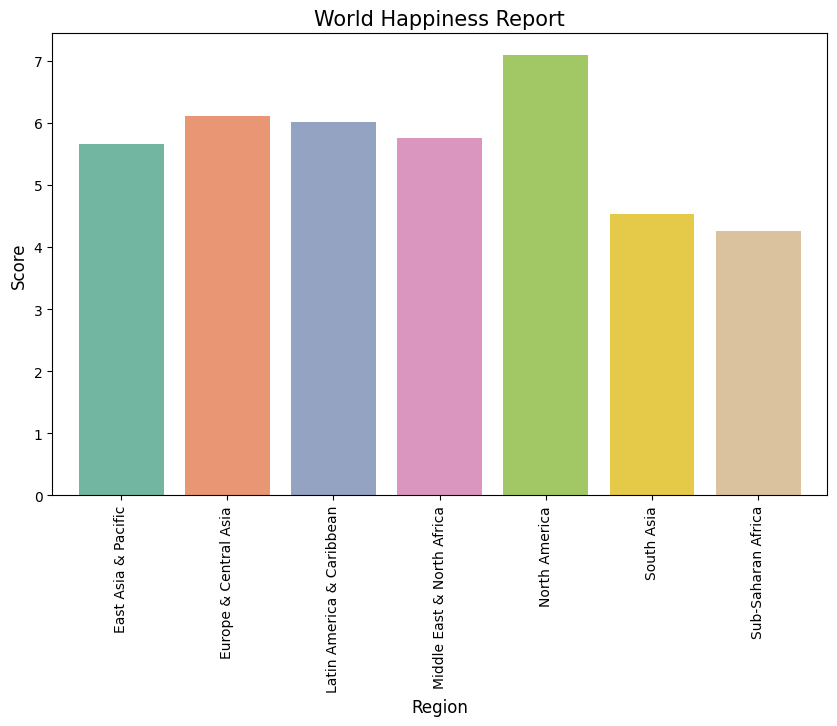

In [46]:
grouped_avrg = merged.groupby('Region')['Score'].mean()
colors = ['#72b6a1', '#e99675', '#95a3c3', '#db96c0', '#a2c865', '#e5c949', '#dbc29e']
grouped_avrg.plot.bar(color=colors,figsize=(10, 6),width=0.8)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.title('World Happiness Report', fontsize=15)

plt.show()